
Assignment #1 - TF-IDF   #David Ordóñez Vivar

# Session 5: Text Mining (II)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-10-19)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/05-Text-Mining-II.ipynb)

In [0]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Exercise: TF-IDF

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns _the inverse of_ the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:


![TF-IDF](img/tf-idf.png)

##1. 
Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc

In [2]:
import spacy
import sys
!{sys.executable} -m spacy download en

nlp = spacy.load("en")
from collections import Counter
import nltk, re, pprint
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from spacy.lang.en.stop_words import STOP_WORDS


    100% |████████████████████████████████| 37.4MB 107.5MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
counts = Counter()

In [4]:
#At the beginning I understood that we needed to do somthing like this.

palab = input('What word?: ')


def tf_fun0(doc,s):
  if type(doc) == str:
  #If the input is a string
    list01 = word_tokenize(doc)
    d=list01.count(s)
    print('This word appears %d time/s in this str' %d)
    print(len(list01))
    tf=d/len(list01)
    print(tf)
  else:
  #If the input is a spacy doc 'spacy.tokens.doc.Doc' 
    list01=[]
    for token in doc1:
      list01.append((token.text))
    d=list01.count(s)
    print('This word appears %d time/s in this doc' %d)
    print(len(list01))
    

tf_fun0(t6,palab) 

What word?: a
This word appears 2 time/s in this str
33
0.06060606060606061


This is the right way. First we lemmatized the docs with this function.

In [5]:
def lemmat(doc):
  lemmas=[token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.lower_ in STOP_WORDS]
  return lemmas
lemmat(nlp(t0))

['china',
 'strong',
 'economy',
 'grow',
 'rapid',
 'pace',
 'politically',
 'differ',
 'greatly',
 'economy']

Then we create a fun that shows the number of times a word appears in the lemmatized Doc. TF_fun:

In [7]:
def tf_fun(doc,word):
  list1=lemmat(doc)
  letter=nlp(word)
  sil=lemmat(letter)
  times=list1.count(' '.join(sil))
  return times

tf_fun(nlp(t1),'China')
    
  

1

#2.
Write a function idf that receives a string and a list of spaCy Docs and returns the inverse of the number of docs that contain the word

Idf_Fun:

In [9]:
list_doc=[t0, t1, t2, t3, t4, t5, t6]

def idf_fun(docs,word):
  row=[]
  for i in docs:
    lemma=lemmat(nlp(i))
    times=lemma.count(''.join(lemmat(nlp(word))))
    if times > 0:
      row.append(1)
  if len(row) > 0:
    return (1/len(row))
  else:
    return 0

idf_fun(list_doc,'China')

0.5

#3.
Write a function tf_idf that receives a string, a spaCy Doc and a list of spaCy Docs and returns the product of tf(t, d) · idf(t, D).

In [11]:
def tf_idf(word,doc,docs):
  tf=tf_fun(doc,word)
  idf=idf_fun(docs,word)
  return tf*idf
  
tf_idf('China',nlp(t1),list_doc)
  

0.5

#4.
Write a function all_lemmas that receives a list of Docs and returns a set of all available lemmas

In [12]:
def all_lemmas(docs):
  l=[]
  for i in docs:
    lemma=lemmat(nlp(i))
    l.append(lemma)
  flat_list = [item for sublist in l for item in sublist]
  return set(flat_list)

all_lemmas(list_doc)
  

{"'s",
 'abe',
 'abenomics',
 'accelerate',
 'ask',
 'be',
 'china',
 'confront',
 'corruption',
 'country',
 'cuba',
 'daily',
 'deer',
 'differ',
 'domestic',
 'ease',
 'economic',
 'economy',
 'endemic',
 'fall',
 'find',
 'fix',
 'future',
 'greatly',
 'grow',
 'hard',
 'heal',
 'horse',
 'hunt',
 'japan',
 'minister',
 'obama',
 'pace',
 'people',
 'politically',
 'prime',
 'problem',
 'putin',
 'rapid',
 'rid',
 'ruble',
 'russia',
 'russian',
 'sanction',
 'shinzo',
 'shirt',
 'strong',
 'thing',
 'tumble',
 'turmoil',
 'value',
 'view',
 'violence',
 'vladimir',
 'work'}

#5. 
Write a function tf_idf_doc that receives a Doc and a list of Docs and returns a dictionary of {lemma: TF-IDF value}, corresponding to each the lemmas of all the available documents

In [13]:
def tf_idf_doc(doc,docs):
    lemmas = all_lemmas(docs)
    dict_lemmas = {i : tf_idf(i,doc,docs) for i in lemmas}
    return dict_lemmas
  
tf_idf_doc(nlp(t3),list_doc)

{"'s": 0.0,
 'abe': 0.0,
 'abenomics': 0,
 'accelerate': 0.0,
 'ask': 0.0,
 'be': 0,
 'china': 0.0,
 'confront': 0.0,
 'corruption': 0.0,
 'country': 0.0,
 'cuba': 0.0,
 'daily': 0.0,
 'deer': 0.0,
 'differ': 0.0,
 'domestic': 0.0,
 'ease': 0.0,
 'economic': 0.0,
 'economy': 0.3333333333333333,
 'endemic': 0.0,
 'fall': 0.0,
 'find': 0.0,
 'fix': 1.0,
 'future': 0.0,
 'greatly': 0.0,
 'grow': 0.0,
 'hard': 1.0,
 'heal': 0.0,
 'horse': 0.0,
 'hunt': 0.0,
 'japan': 0.0,
 'minister': 0.0,
 'obama': 0.0,
 'pace': 0.0,
 'people': 0.0,
 'politically': 0.0,
 'prime': 0.0,
 'problem': 0.0,
 'putin': 0.5,
 'rapid': 0.0,
 'rid': 0.0,
 'ruble': 0.5,
 'russia': 1.0,
 'russian': 0.0,
 'sanction': 0.0,
 'shinzo': 0.0,
 'shirt': 0.0,
 'strong': 0.0,
 'thing': 0.0,
 'tumble': 1.0,
 'turmoil': 0.0,
 'value': 0.0,
 'view': 0.0,
 'violence': 0.0,
 'vladimir': 0.5,
 'work': 0.5}

#6.
Write a function tf_idf_scores that receives a list of Docs and returns a DataFrame displaying the lemmas in the columns and the documents in the rows.

In [0]:
import pandas as pd

In [15]:
for doc in list_doc:
  dict_df=(tf_idf_doc(nlp(doc),list_doc))
  print(dict_df)
 

{'greatly': 1.0, 'hunt': 0.0, 'vladimir': 0.0, 'accelerate': 0.0, 'work': 0.0, 'russia': 0.0, 'fall': 0.0, 'abe': 0.0, 'heal': 0.0, 'corruption': 0.0, 'sanction': 0.0, 'economic': 0.0, 'hard': 0.0, 'people': 0.0, 'violence': 0.0, 'ease': 0.0, 'tumble': 0.0, 'ask': 0.0, 'be': 0, "'s": 0.0, 'turmoil': 0.0, 'pace': 1.0, 'grow': 1.0, 'shinzo': 0.0, 'shirt': 0.0, 'russian': 0.0, 'domestic': 0.0, 'ruble': 0.0, 'abenomics': 0, 'economy': 0.6666666666666666, 'cuba': 0.0, 'daily': 0.0, 'country': 0.0, 'minister': 0.0, 'fix': 0.0, 'view': 0.0, 'future': 0.0, 'strong': 1.0, 'differ': 1.0, 'confront': 0.0, 'japan': 0.0, 'politically': 1.0, 'rid': 0.0, 'deer': 0.0, 'find': 0.0, 'thing': 0.0, 'rapid': 1.0, 'putin': 0.0, 'prime': 0.0, 'value': 0.0, 'problem': 0.0, 'horse': 0.0, 'endemic': 0.0, 'china': 0.5, 'obama': 0.0}
{'greatly': 0.0, 'hunt': 0.0, 'vladimir': 0.0, 'accelerate': 0.0, 'work': 0.0, 'russia': 0.0, 'fall': 0.0, 'abe': 0.0, 'heal': 0.0, 'corruption': 1.0, 'sanction': 0.0, 'economic': 0.

In [16]:
def dataframe(docs):
  index=[0, 1, 2, 3, 4, 5, 6]
  dt=[]
  for doc in docs:
    dt.append(tf_idf_doc(nlp(doc),docs))
  df = pd.DataFrame(dt,index=index)
  return df

dataframe(list_doc)

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0,0.0,0.0,0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0.0,0.0,0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.5,0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,1.0,0.5,0,0.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#7.
Visualize the TF-IDF, like this:

In [0]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


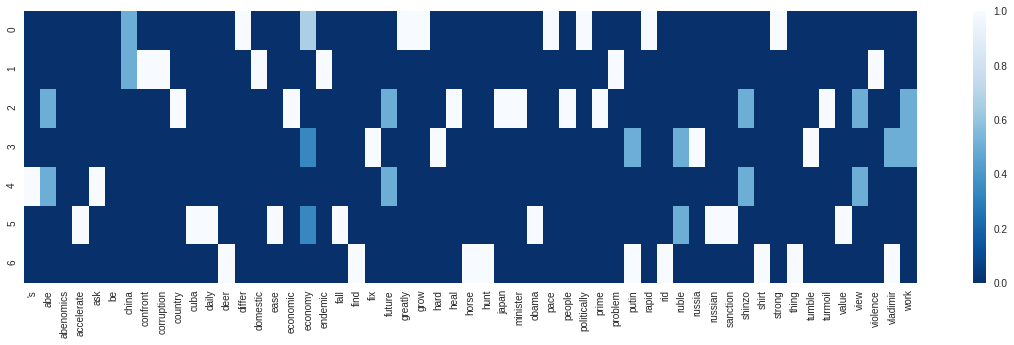

In [18]:
plt.figure(figsize = (20,5))
sns.heatmap(dataframe(list_doc), vmax=1,  vmin=0,  cmap="Blues_r")
